In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.optimize import minimize
from scipy.ndimage import map_coordinates

img = cv2.imread('reassembled_E2_2.png', cv2.IMREAD_GRAYSCALE)
img = ((img>100)*255).astype('uint8')
n = 20

img = cv2.dilate(img, np.ones((n+5,n+5)))
img = cv2.blur(img, (n+1,n+1)) 

In [10]:
def get_points_on_line(x):
    p = x[:2].reshape(-1,1)
    q = x[2:].reshape(-1,1)
    t = np.linspace(0,1,10**3)
    coords = t*p+(1-t)*q
    length = np.linalg.norm(p-q)
    values = (map_coordinates(img, coords, prefilter=False)-255*9/10)
    value = values.mean()
    return -value*length

res = minimize(get_points_on_line, [250,200,500,700], method = 'Nelder-Mead')

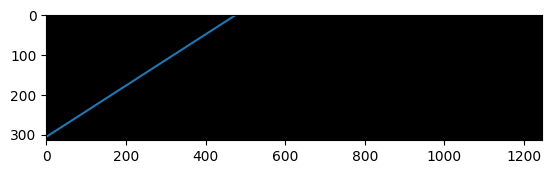

In [11]:
x = res.x
p = x[:2].reshape(-1,1)
q = x[2:].reshape(-1,1)
t = np.linspace(0,1,10**3)
coords = t*p+(1-t)*q

plt.imshow(img, cmap='gray')
plt.plot(coords[1], coords[0])